#PL4: CIRCUITOS DE DOS QUBITS EN QISKIT

Comenzamos instalando las librerías necesarias. En el momento de creación de este notebook, las versiones actuales son:


*   Qiskit: 1.2.4
*   Qiskit IBM Runtime: 0.30.0
*   Qiskit Aer: 0.15.1
*   Pylatexenc: 2.10



In [1]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created w

Trabajar con dos qubits es muy parecido a trabajar con un qubit. Las diferencias son que:

* Declararemos dos qubits y dos bits al crear el circuito
* Las puertas de dos qubits, como la CNOT, reciben como argumentos los dos qubits sobre los que actúan
* Al medir, podemos medir todos los qubits

Como ejemplo, vamos a crear un circuito para preparar un estado entrelazado (un estado de Bell, en concreto) de la forma $$\frac{1}{\sqrt{2}}(|00>+|11>)$$

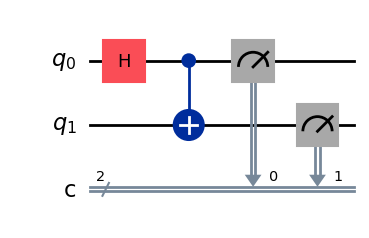

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1) # Puerta CNOT o CX. El primer qubit es el control y el segundo es el target
qc.measure(range(2),range(2)) # Medimos todos los qubits y recibimos los resultados en los bits clásicos

qc.draw("mpl")

Utilizamos un simulador para ejecutar el circuito. Utilizamos 10 shots (ejecuciones) y una semilla (1234) para que los resultados sean reproducibles.

In [3]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator


sampler = Sampler(AerSimulator(seed_simulator = 1234))
job = sampler.run([qc], shots = 10)
results = job.result()
d = results[0].data.c # Acceso a los valores de las mediciones
print("Número de ejercuciones:", d.num_shots)
print("Estadísticas de las ejecuciones:", d.get_counts())
print("Resultados de las medidas:", d.array)
print("Resultados de las medidas como cadenas de texto:", d.get_bitstrings())


Número de ejercuciones: 10
Estadísticas de las ejecuciones: {'00': 6, '11': 4}
Resultados de las medidas: [[0]
 [0]
 [0]
 [0]
 [3]
 [0]
 [3]
 [0]
 [3]
 [3]]
Resultados de las medidas como cadenas de texto: ['00', '00', '00', '00', '11', '00', '11', '00', '11', '11']


Ahora, vamos a calcular de forma exacta las amplitudes del vector de estado final.

In [4]:
qc.remove_final_measurements()
from qiskit.quantum_info import Statevector
statevector = Statevector(qc)
print("Amplitudes del vector de estado:", statevector)

Amplitudes del vector de estado: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


##EJERCICIOS

1.- Crea un circuito que prepare un estado entrelazado de la forma $$\frac{1}{\sqrt{2}}(|01>+|10>)$$

Ejecútalo diez veces. ¿Qué valores obtienes?

Obtén el vector de estado y comprueba que se corresponde con el estado que querías preparar.





2.- Crea un circuito que prepare un estado entrelazado de la forma $$\frac{1}{\sqrt{2}}(|00>-|11>)$$

Ejecútalo diez veces. ¿Qué valores obtienes?

Obtén el vector de estado y comprueba que se corresponde con el estado que querías preparar.





3.- Crea un circuito que prepare un estado entrelazado de la forma $$\frac{1}{\sqrt{2}}(|01>-|10>)$$

Ejecútalo diez veces. ¿Qué valores obtienes?

Obtén el vector de estado y comprueba que se corresponde con el estado que querías preparar.





4.- (Opcional) Ejecuta alguno de los circuitos de este notebook en un ordenador cuántico real. ¿Qué resultados obtienes? ¿Por qué?